# Binomal Distribution
Discrete probability distribution, A random variable X is said to follow a binomial distribution when:
1) Random variable have success and failure.<br />
2) Objective is to find probability of getting x successes out of n trials.<br />
3) Probability of success is p and thus the probability of failure is 1 - p.<br />
4) Probability p is constant and does not change between trials.

Example: 
FTO is an e commerce company,it is observed  10% of their customer returns the items purchased.
On a specific day 20 customers purchased items for FTO.

1. Probability that exactly 5 customers will return the items.

In [3]:
!pip install scipy

In [15]:
%matplotlib inline
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

stats.binom.pmf(5,20,0.1)
stats.binom.pmf(2,20,0.1)

0.28517980706429846

In [11]:
# range(0,20) returns all values from 0 to 20 excluding 21
pmf_df = pd.DataFrame({'success_probability':range(0,20),
                        'pmf': list(stats.binom.pmf(range(0,20),20,0.1))   
})

pmf_df.head(20)

,success_probability,pmf
0,0,1.215767e-01
1,1,2.701703e-01
2,2,2.851798e-01
3,3,1.901199e-01
4,4,8.977883e-02
5,5,3.192136e-02
6,6,8.867045e-03
7,7,1.970454e-03
8,8,3.557765e-04
9,9,5.270763e-05


Data visualization: 

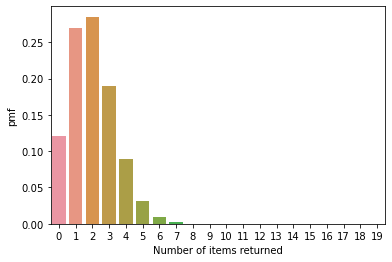

In [23]:
sn.barplot(x=pmf_df.success_probability,y = pmf_df.pmf)
plt.ylabel('pmf')
plt.xlabel('Number of items returned');

2) Probability that a maximum of 5 customres will return the items.

In [24]:
stats.binom.cdf(5,20,0.1)

0.988746865835491

3) Probability that more than 5 customers will return the items purchased by them

Total of all the probabilities will always be equal to 1 and we got the CDF( cumulative distributive  function) 
of max of 5 customers in step 2.
solution for this is 1 - CDF above value

In [25]:
1- stats.binom.cdf(5,20,0.1)


0.011253134164509015

In [26]:
mean, variance = stats.binom.stats(20,0.1)
print("Average : ", mean," Variance : ",variance)

Average :  2.0  Variance :  1.8


# Poisson distribution
No: of events that occoured over a period of time or space. ex: cancellation of orders by customer.

Example:
Calls arriving at a call center follows a Poission dist at 10 calls per hours
1) Calculate probability that a maximum of  5 calls will arrives at the call center.

In [27]:
stats.poisson.cdf(5,10)

0.06708596287903189

2) Calculate the probability that the number of calls over 3 hours periods will exceed 30 

In [28]:
 # first parameter is 3 * 10 mean number of call over 3 hours( per hour is 10 calls)
 # second parameter is 
1 - stats.poisson.cdf(30,30)

0.45164848742208863

Data visualization 

In [31]:
pmf_df = pd.DataFrame({"success": range(0,30),
                      "pmf": list(stats.poisson.pmf(range(0,30),10))})
pmf_df

,success,pmf
0,0,4.539993e-05
1,1,4.539993e-04
2,2,2.269996e-03
3,3,7.566655e-03
4,4,1.891664e-02
5,5,3.783327e-02
6,6,6.305546e-02
7,7,9.007923e-02
8,8,1.125990e-01
9,9,1.251100e-01


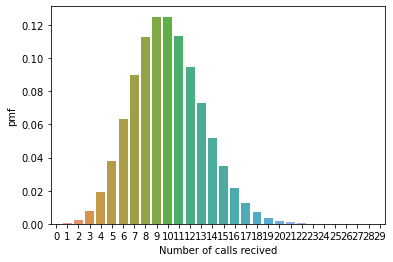

In [33]:
sn.barplot(x = pmf_df.success,y=pmf_df.pmf)
plt.ylabel('pmf')
plt.xlabel('Number of calls recived');

# Exponential distribution
This is a single parameter continuous distribution that is traditionally used for modeling time-to-failure of electronic components.

Time-of-failure of an avionic system follows an exponential dist with a mean time between failure (MTBF) of 1000 hours.

1) Calcualte the probability that the system will fail before 1000 hours

In [34]:
stats.expon.cdf(1000, loc=1/1000,scale = 1000)

0.6321201909489326

2) Calcualte the probability that it will not fail up to 2000 hours

In [35]:
1- stats.expon.cdf(2000, loc = 1/1000, scale = 1000)

0.13533541857196352

3) Calculate the time by which  10% of system will fail (i.e., calculate P10 life) <br/>
This can be calculated by ppf(percentage of point function) and is an inverse of CDF.

In [37]:
time_val = stats.expon.ppf(0.1, loc = 1/1000,scale = 1000)
print("This is, by ", time_val, " hours, 10% of system will fail.")

This is, by  105.36151565782632  hours, 10% of system will fail.


Text(0.5, 0, 'Time of failure')

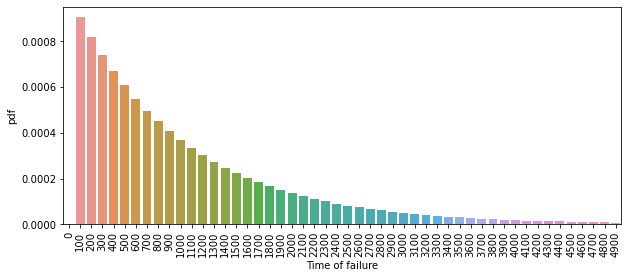

In [48]:
plt.figure(figsize=(10,4))
pdf_df = pd.DataFrame({"success":range(0,5000,100),
                      "pdf": list(stats.expon.pdf(range(0,5000,100), loc = 1/1000, scale = 1000))})
sn.barplot(x= pdf_df.success,y = pdf_df.pdf)
plt.xticks(rotation = 90)
plt.xlabel('Time of failure')

In [50]:
import os
current_path = os.getcwd()
current_path

'C:\\Users\\Harshitha'